In [1]:
import gym_minigrid
print(gym_minigrid.__file__)
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.colors import LogNorm, Normalize
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set_theme()
import matplotlib.pyplot as plt
from io import StringIO


import pickle as pkl
import gzip
import os
from io import StringIO
import pandas as pd

import gym_minigrid
print(gym_minigrid.__file__)
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.colors import LogNorm, Normalize
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set_theme()
import matplotlib.pyplot as plt
from io import StringIO
import matplotlib.ticker as ticker
import matplotlib.patches as mpatches

import pickle as pkl
import gzip
import os
from io import StringIO
import pandas as pd

import gzip
import pickle as pkl
import pandas as pd
import seaborn as sns; sns.set_theme()
import numpy as np
# 
import matplotlib.ticker as tkr

formatter = tkr.ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
formatter.set_powerlimits((-2, 2))

np.set_printoptions(suppress=True)

def nans(carte):
    for i in [0,1]:
        for j in [2,3,4,5,6,7]:
            carte[i,j] = np.nan
    return carte

/home/mheuillet/anaconda3/lib/python3.9/site-packages/gym_minigrid/__init__.py
/home/mheuillet/anaconda3/lib/python3.9/site-packages/gym_minigrid/__init__.py


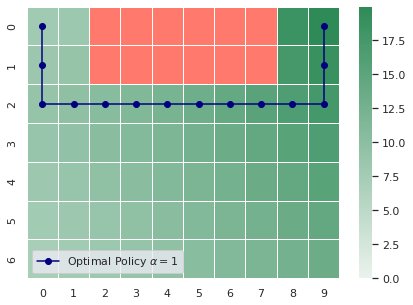

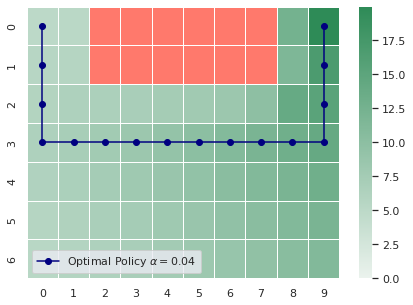

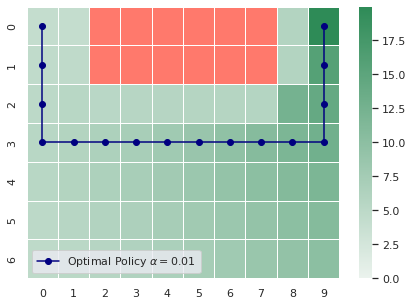

In [2]:
stochasticity = 0.05
maximum = []
minimum = []

paths = []
for i in [1,0.04,0.01]:

    fig, axn = plt.subplots( nrows=1, ncols=1, figsize=(7,5), sharex = True, sharey = True )
    
    map = pkl.load(  open('/home/mheuillet/Desktop/map_{}_{}.pkl'.format(i, stochasticity), 'rb') )
    path = np.array( pkl.load(  open('/home/mheuillet/Desktop/path_{}_{}.pkl'.format(i, stochasticity), 'rb') ) )
    paths.append(path)
    maximum.append( np.max(map) )
    minimum.append( np.min(map) )
    
    annotations = pd.DataFrame( np.round( map, 2)  )
    annotations = annotations.replace(0,".")
    annotations = annotations.astype(str)  
    annotations.loc[0,9] = 'G'
    annotations.loc[0,0] = 'S'

    a = sns.heatmap( nans( map) , linewidths=.5,  cmap=sns.light_palette("seagreen", as_cmap=True),  fmt="s",annot_kws={"fontsize":10}, vmin = min(minimum), vmax = max(maximum) ) #annot=annotations,
    a.set_facecolor('xkcd:salmon') 
    a.plot( path[0] + 0.5, path[1] + 0.5, 'o-', color='navy', label=r'Optimal Policy $\alpha = {}$'.format(i))
    
    a.legend()
#     fig.savefig('/home/mheuillet/Desktop/CVAR_optimal_DP_{}_{}.png'.format(i, stochasticity), bbox_inches='tight')

In [10]:
seed = 1
stoch = 0.05
budget = 25
path = '/home/mheuillet/Desktop/CvarAdversarialRL-main/results'
with gzip.open( os.path.join(path, 'newfig_experiment3_{}_{}_0.7_{}_0_5m_1.pkl.gz'.format(budget, stoch, seed ) )  ,'rb') as f:
    map = pkl.load(f)
    
map

array([[1., 1., 1., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 1., 1., 0., 0., 0.]])

In [4]:
width=12-2
height=9-2
final_map = np.zeros( (height, width) )
stoch = 0.05
budget = 100
alpha = 0.01
i = 2
path = '/home/mheuillet/Desktop/CARL2'
for seed in [1,2,3,4,5,6,7,8,9,10]:
    
    if budget == 1:
        with gzip.open( os.path.join(path, 'test_experiment2_{}_{}_0.7_{}_0_5m_1.pkl.gz'.format(budget, stoch, seed ) )  ,'rb') as f:
            map = pkl.load(f)
                
    else:
        with gzip.open( os.path.join(path, 'test_experiment3_{}_{}_0.7_{}_0_5m_1.pkl.gz'.format(budget, stoch, seed ) )  ,'rb') as f:
            map = pkl.load(f)
            
    annotations = pd.DataFrame( np.zeros( map.T.shape)  )
    annotations[ annotations == 0 ] = ' '
    annotations = annotations.astype(str)  
    annotations.loc[0,9] = 'G'
    annotations.loc[0,0] = 'S'

    final_map = final_map + map.T

    fig, ax = plt.subplots()
    
    fig = sns.heatmap( nans( map.T) , linewidths=.5,  ax=ax,  cmap="YlGnBu", vmin = 0, vmax = 3, annot=annotations, fmt="s",annot_kws={"fontsize":20} )
    fig.set_facecolor('#fdaa48')
    
    cbar = ax.collections[0].colorbar
    cbar.ax.tick_params(labelsize=15)
    fig.set(xticklabels=[], yticklabels=[]) 
    

    plt.savefig('/home/mheuillet/Desktop/final_figures/appendix/seed_{}_{}.png'.format(seed,budget) )
    
fig, ax = plt.subplots()
annotations = pd.DataFrame(np.zeros( final_map.shape)  )
annotations = annotations.where( annotations != 0 , '')
annotations = annotations.astype(str)  
annotations.loc[0,9] = 'G'
annotations.loc[0,0] = 'S'
fig = sns.heatmap( nans(final_map ), linewidths=.5,  cmap="YlGnBu" , vmin =0, vmax=10,annot=annotations, annot_kws={"fontsize":20}, fmt="s" ) 
fig.plot( paths[i][0] + 0.5, paths[i][1] + 0.5, 'o-', color='red', label=r'Optimal Policy $\alpha = {}$'.format(alpha))
fig.set(xticklabels=[], yticklabels=[]) 
fig.legend()
fig.set_facecolor('#fdaa48')
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=15)

plt.savefig('/home/mheuillet/Desktop/final_figures/appendix/averaged_seed_{}.pdf'.format(budget), format="pdf", dpi=1200, bbox_inches='tight')

[tensor([1.], device='cuda:0'), tensor([1.], device='cuda:0'), tensor([1.], device='cuda:0'), tensor([1.], device='cuda:0'), tensor([1.], device='cuda:0'), tensor([1.], device='cuda:0'), tensor([1.], device='cuda:0'), tensor([1.], device='cuda:0'), tensor([1.], device='cuda:0'), tensor([1.], device='cuda:0'), tensor([1.], device='cuda:0'), tensor([1.], device='cuda:0'), tensor([1.], device='cuda:0'), tensor([1.], device='cuda:0'), tensor([1.], device='cuda:0'), tensor([1.], device='cuda:0'), tensor([1.], device='cuda:0'), tensor([1.], device='cuda:0'), tensor([1.], device='cuda:0'), tensor([1.], device='cuda:0'), tensor([1.], device='cuda:0')]
[tensor([1.], device='cuda:0'), tensor([1.], device='cuda:0'), tensor([1.], device='cuda:0'), tensor([1.], device='cuda:0'), tensor([1.], device='cuda:0'), tensor([1.], device='cuda:0'), tensor([1.], device='cuda:0'), tensor([1.], device='cuda:0'), tensor([1.], device='cuda:0'), tensor([1.], device='cuda:0'), tensor([1.], device='cuda:0'), tensor

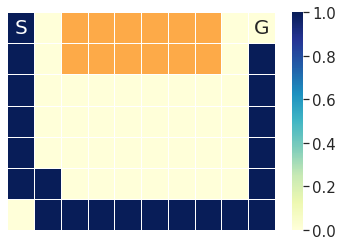

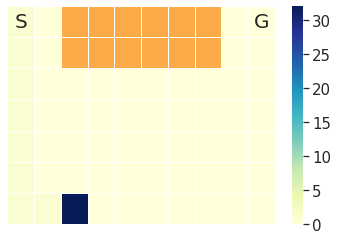

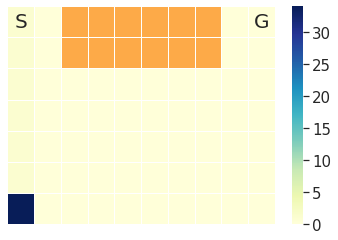

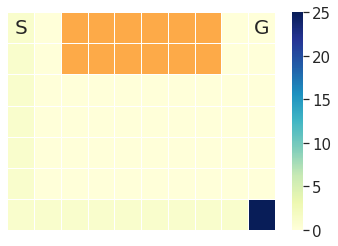

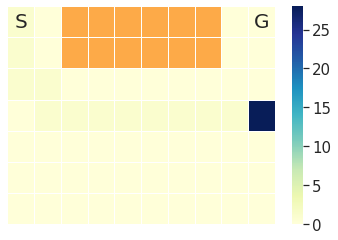

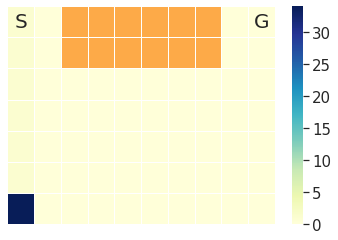

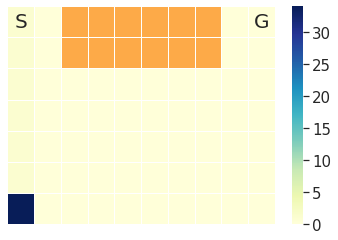

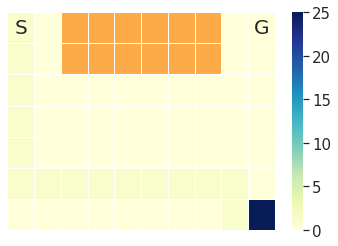

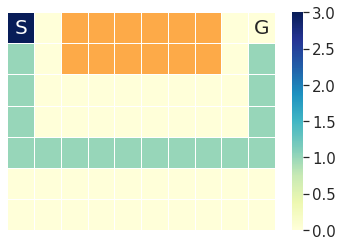

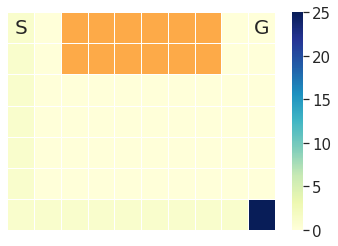

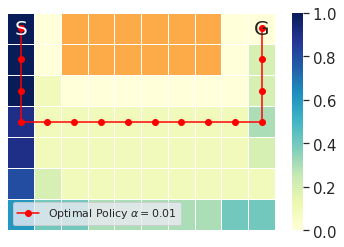

In [15]:
def vec2map(data):
    data = np.array(data, dtype=int)
    map = np.zeros( (7,10) )
    for x in data:
        map[x[1],x[0] ] +=1
    return map


width=12-2
height=9-2
final_map = np.zeros( (height, width) )
stoch = 0.1
budget = 100
alpha = 0.01
i = 2
nb_steps = 0
for seed in [0,1,2,3,4,5,6,7,8,9]:
    
    path = '/home/mheuillet/Desktop/deterministic_traj05/lr=0.002--alpha={}--seed={}'.format(alpha,seed) 
    data = np.load( os.path.join(path, 'trajs.npy') )
    nb_steps += len(data)
    map = vec2map(data)
    map2 = map.copy()
    map2[map2>0]=1
        
    annotations = pd.DataFrame( np.zeros( map.shape)  )
    annotations[ annotations == 0 ] = ' '
    annotations = annotations.astype(str)  
    annotations.loc[0,9] = 'G'
    annotations.loc[0,0] = 'S'

    final_map = final_map + map2

    fig, ax = plt.subplots()
    
    from matplotlib.colors import LogNorm
    fig = sns.heatmap( nans( map) , linewidths=.5,  ax=ax, cmap="YlGnBu",  annot=annotations, fmt="s",annot_kws={"fontsize":20} )
    fig.set_facecolor('#fdaa48')
    
    cbar = ax.collections[0].colorbar
    cbar.ax.tick_params(labelsize=15)
    fig.set(xticklabels=[], yticklabels=[]) 
    

    plt.savefig('/home/mheuillet/Desktop/final_figures/IQN05seed_{}_{}.png'.format(seed,budget) )
    
fig, ax = plt.subplots()
annotations = pd.DataFrame(np.zeros( final_map.shape)  )
annotations = annotations.where( annotations != 0 , '')
annotations = annotations.astype(str)  
annotations.loc[0,9] = 'G'
annotations.loc[0,0] = 'S'
fig = sns.heatmap( nans(final_map/10), linewidths=.5,  cmap="YlGnBu" ,vmin = 0, vmax = 1,cbar_kws={"format": formatter}, annot=annotations, annot_kws={"fontsize":20}, fmt="s" ) 
fig.plot( paths[i][0] + 0.5, paths[i][1] + 0.5, 'o-', color='red', label=r'Optimal Policy $\alpha = {}$'.format(alpha))
fig.set(xticklabels=[], yticklabels=[]) 
fig.legend()
fig.set_facecolor('#fdaa48') ##fdaa48
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=15)

plt.savefig('/home/mheuillet/Desktop/final_figures/IQN05averaged_seed_{}.pdf'.format(budget), format="pdf", dpi=1200, bbox_inches='tight')